In [1]:
# Gerekli kütüphanler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cv2

Veriyi indirdiğim site:
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [2]:
# Burada kod dosyası ile aynı dizinde olan bir klasör var.
# Adı: cats_and_dogs. Bunun içinde de iki tane klasör var.
# Adları: train ve validation. 
# Her iki klasörün içinde de sınıf klasörleri var, cats ve dogs.
# cats'in içinde kedi resimleri, dogs'un içinde köpek resimleri var
# Bu sayede ekstra bir etiketleme yapmadan bu sınıf adları resimlerin 
# etiketi olacak.
# eğitim klasörünün dizinini veriyoruz
train_dir = 'cats_and_dogs/train'
# doğrulama klasörünün dizinini veriyoruz
# Bu doğrulama verisini test verisi olarak düşünebiliriz.
# Doğru kullanımda  ekstra test klasörü de olmalı
# Fakat genelde veri ikiye ayrılır. O yüzden ben de böyle yaptım
val_dir = 'cats_and_dogs/validation'
# Train klasörü içindeki .jpg uzantılı tüm dosyaların dizinini aldık.
train_images= glob(train_dir + '/*/*.jpg')
# validation  klasörü içindeki .jpg uzantılı tüm dosyaların dizinini aldık.
val_images = glob(val_dir + '/*/*.jpg')

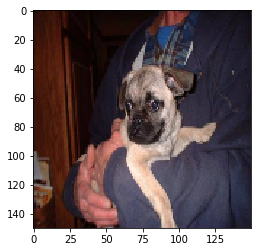

In [15]:
# Resimlerin dizinini bir liste şeklinde almıştık.
# burada bu listeden rastgele bir dizin alıyoruz.
pred_image_name=np.random.choice(train_images)
# Bu rastgele dizini kullanarak rastgele resim yükledik
img = cv2.imread(pred_image_name)
# Resim boyutunu 150,150 yaptık
img = cv2.resize(img, (150,150))
# opencv'deki resimler BGR olduğu için bunu RGB yaptık
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Resmi gösteriyoruz.
plt.imshow(img);
# bu kod her seferinde rastgele bir resim gösterir.

In [4]:
# Klasördeki resimleri kullanmak için bunu kullanacağız.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# burada resim yükleme için bir yapı oluşturuyoruz hem eğitim
# hem de doğrulama verisi için
# Buradaki rescale ifadesi her bir resmi yüklerken resmi 255'e
#  bölüyoruz. Böylece resimler 0 ile 1 arasında ölçeklendi
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
val_datagen  = ImageDataGenerator( rescale = 1.0/255. )


In [5]:
# Burada klasörden resim yüklemek için oluşturduğumuz
# yapıyı kullanarak resimleri yüklüyoruz.
# train_dir eğitim klasörünün adresi
# shuffle ile resimleri rastgele sıra ile yüklüyor.
# batch_size ifadesi aynı anda modele kaç tane veri
# vereceğimizi ifade ediyor.Bu sayı bilgisayar 
# donanımına göre değişir. Ama 2'nin katları olmalı
# target_size verinin boyutu. 
# class_mode ise binary çünkü iki tane sınıf var
train_generator = train_datagen.flow_from_directory(
  train_dir,
  shuffle=True,
  batch_size=16,
  target_size=[150,150],
  class_mode='binary'
)
# Bunu da uygun şekilde doğrulama verileri için
# yapıyoruz. Burada shuffle yapmaya gerek yok
valid_generator = val_datagen.flow_from_directory(
  val_dir,
  batch_size=16,
  target_size=[150,150],
  class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# modeli oluşturyoruz.
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # iki sınıf olduğu için genelde sigmoid fonskiyonu kullanılır.
    # ayrıca tek bir nöron kulanıyoruz ikili sınıflandırma olduğu için
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
# ikili sınıflandırma olduğu için loss da 
# buna uygun olmalı.
# Optimizer olarak da RMSProp kullandık.
# Adam da olurdu. Fakat benim veride 
# RMSProp  daha iyi çalıştı.
model.compile(optimizer = 'RMSProp', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])


In [8]:
# normalde burada x_train ve y_train
# diyorudk. Fakat train_generator 
# bu işi görüyor. Validation için de
#valid_generator
r= model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=10

)

Epoch 1/10
125/125 [==============================] - 104s 673ms/step - loss: 1.0942 - accuracy: 0.5040 - val_loss: 0.6865 - val_accuracy: 0.5430
Epoch 2/10
125/125 [==============================] - 23s 182ms/step - loss: 0.7006 - accuracy: 0.5810 - val_loss: 0.6359 - val_accuracy: 0.6650
Epoch 3/10
125/125 [==============================] - 23s 186ms/step - loss: 0.6204 - accuracy: 0.6705 - val_loss: 0.6029 - val_accuracy: 0.6690
Epoch 4/10
125/125 [==============================] - 19s 147ms/step - loss: 0.5606 - accuracy: 0.7255 - val_loss: 0.5529 - val_accuracy: 0.7300
Epoch 5/10
125/125 [==============================] - 19s 154ms/step - loss: 0.5030 - accuracy: 0.7710 - val_loss: 0.5654 - val_accuracy: 0.7180
Epoch 6/10
125/125 [==============================] - 19s 151ms/step - loss: 0.4109 - accuracy: 0.8100 - val_loss: 0.6331 - val_accuracy: 0.6730
Epoch 7/10
125/125 [==============================] - 20s 156ms/step - loss: 0.3414 - accuracy: 0.8495 - val_loss: 0.8024 - val_a

In [9]:
# modelin doğrulama verisi üzerindeki başarısı
model.evaluate(valid_generator)

63/63 [==============================] - 3s 49ms/step - loss: 1.2963 - accuracy: 0.6980


[1.296274185180664, 0.6980000138282776]

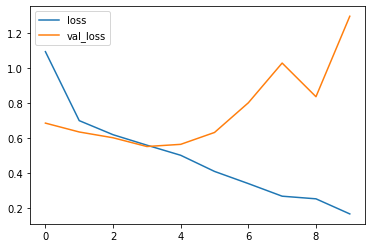

In [10]:

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

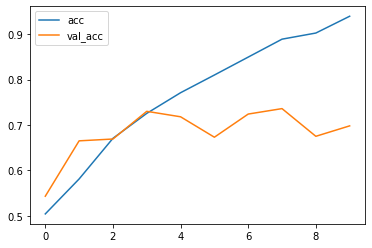

In [13]:

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()